Lab2

In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import

In [3]:
path = 'D:/P/ДСБД/lab2_dataset/'
extension = '.csv'
files = [file for file in os.listdir(path) if file.endswith(extension)]
dfs = []
for file in files:
    df = pd.read_csv(os.path.join(path, file), delimiter=';', encoding='latin-1')
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,2905,26,NaN,A9,1667 WASHINGTON AVENUE,NaN,...,1,0.0,1,4 750,3 167,1899.0,1,A9,980 000,08.09.2022
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,24,NaN,A1,410 EAST 179TH STREET,NaN,...,1,0.0,1,1 842,2 048,1901.0,1,A1,655 000,01.11.2022
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,65,NaN,A1,4455 PARK AVENUE,NaN,...,1,0.0,1,1 622,1 587,1899.0,1,A1,520 000,26.10.2022
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1,0.0,1,1 646,1 497,1899.0,1,A1,215 000,18.04.2023
4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,NaN,A1,461 EAST 178 STREET,NaN,...,1,0.0,1,1 782,1 548,1899.0,1,A1,0,14.04.2023


Fix BOROUGH column values

In [4]:
df.replace({'BOROUGH': {1: 'MANHATTAN'}}, inplace=True)
df.replace({'BOROUGH': {2: 'BRONX'}}, inplace=True)
df.replace({'BOROUGH': {3: 'BROOKLYN'}}, inplace=True)
df.replace({'BOROUGH': {4: 'QUEENS'}}, inplace=True)
df.replace({'BOROUGH': {5: 'STATEN ISLAND'}}, inplace=True)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,PRICE,SALE DATE
0,BRONX,BATHGATE,01 ONE FAMILY DWELLINGS,1,2905,26,NaN,A9,1667 WASHINGTON AVENUE,NaN,...,1,0.0,1,4 750,3 167,1899.0,1,A9,980 000,08.09.2022
1,BRONX,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,24,NaN,A1,410 EAST 179TH STREET,NaN,...,1,0.0,1,1 842,2 048,1901.0,1,A1,655 000,01.11.2022
2,BRONX,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,65,NaN,A1,4455 PARK AVENUE,NaN,...,1,0.0,1,1 622,1 587,1899.0,1,A1,520 000,26.10.2022
3,BRONX,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1,0.0,1,1 646,1 497,1899.0,1,A1,215 000,18.04.2023
4,BRONX,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,NaN,A1,461 EAST 178 STREET,NaN,...,1,0.0,1,1 782,1 548,1899.0,1,A1,0,14.04.2023


In [5]:
df.dtypes

BOROUGH                            object
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                               int64
LOT                                 int64
EASEMENT                          float64
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                  object
COMMERCIAL UNITS                   object
TOTAL UNITS                        object
LAND SQUARE FEET                   object
GROSS SQUARE FEET                  object
YEAR BUILT                        float64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
PRICE                              object
SALE DATE                          object
dtype: object

In [6]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                 73
BLOCK                                 0
LOT                                   0
EASEMENT                          74140
BUILDING CLASS AT PRESENT            73
ADDRESS                               0
APARTMENT NUMBER                  56192
ZIP CODE                              6
RESIDENTIAL UNITS                 18114
COMMERCIAL UNITS                  31512
TOTAL UNITS                       15761
LAND SQUARE FEET                  33865
GROSS SQUARE FEET                 33865
YEAR BUILT                         4966
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
PRICE                                 0
SALE DATE                             0
dtype: int64

Drop the EASEMENT column, because it is empty

In [7]:

df = df.drop(['EASEMENT'], axis=1)
df['TAX CLASS AT PRESENT'].fillna('No class', inplace = True)
df['BUILDING CLASS AT PRESENT'].fillna('No class', inplace = True)
df['APARTMENT NUMBER'].fillna('0', inplace = True)
df['RESIDENTIAL UNITS'] = df['RESIDENTIAL UNITS'].str.replace(' ', '')
df['COMMERCIAL UNITS'] = df['COMMERCIAL UNITS'].str.replace(' ', '')
df['TOTAL UNITS'] = df['TOTAL UNITS'].str.replace(' ', '')
df['RESIDENTIAL UNITS'].fillna('0', inplace = True)
df['COMMERCIAL UNITS'].fillna('0', inplace = True)
df['TOTAL UNITS'].fillna('0', inplace = True)
df['LAND SQUARE FEET'].fillna('0', inplace = True)
df['GROSS SQUARE FEET'].fillna('0', inplace = True)
df['PRICE'] = df['PRICE'].str.replace(' ', '')
convert_dict = {'RESIDENTIAL UNITS': int,
                'COMMERCIAL UNITS': int,
                'TOTAL UNITS': int, 
                'PRICE': int
                }
 
df = df.astype(convert_dict)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,PRICE,SALE DATE
0,BRONX,BATHGATE,01 ONE FAMILY DWELLINGS,1,2905,26,A9,1667 WASHINGTON AVENUE,0,10457.0,1,0,1,4 750,3 167,1899.0,1,A9,980000,08.09.2022
1,BRONX,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,24,A1,410 EAST 179TH STREET,0,10457.0,1,0,1,1 842,2 048,1901.0,1,A1,655000,01.11.2022
2,BRONX,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,65,A1,4455 PARK AVENUE,0,10457.0,1,0,1,1 622,1 587,1899.0,1,A1,520000,26.10.2022
3,BRONX,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,A1,4453 PARK AVENUE,0,10457.0,1,0,1,1 646,1 497,1899.0,1,A1,215000,18.04.2023
4,BRONX,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,A1,461 EAST 178 STREET,0,10457.0,1,0,1,1 782,1 548,1899.0,1,A1,0,14.04.2023


In [8]:
df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,PRICE
count,74140.000000,74140.000000,74134.000000,74140.000000,74140.000000,74140.000000,69174.000000,74140.000000,7.414000e+04
mean,4164.046372,390.034691,10846.863558,1.249285,0.055786,1.873928,1952.738341,1.657998,1.359191e+06
std,3538.238536,659.235727,567.199935,16.499132,4.513857,18.257615,36.497428,0.792506,8.513047e+06
min,1.000000,1.000000,10001.000000,0.000000,0.000000,0.000000,220.000000,1.000000,0.000000e+00
25%,1262.000000,22.000000,10304.000000,0.000000,0.000000,0.000000,1925.000000,1.000000,0.000000e+00
50%,3248.000000,51.000000,11209.000000,0.000000,0.000000,0.000000,1950.000000,2.000000,5.200000e+05
75%,6169.250000,1003.000000,11356.000000,0.000000,0.000000,1.000000,1975.000000,2.000000,9.999990e+05
max,16350.000000,9079.000000,11697.000000,1272.000000,1178.000000,1272.000000,2023.000000,4.000000,5.981558e+08


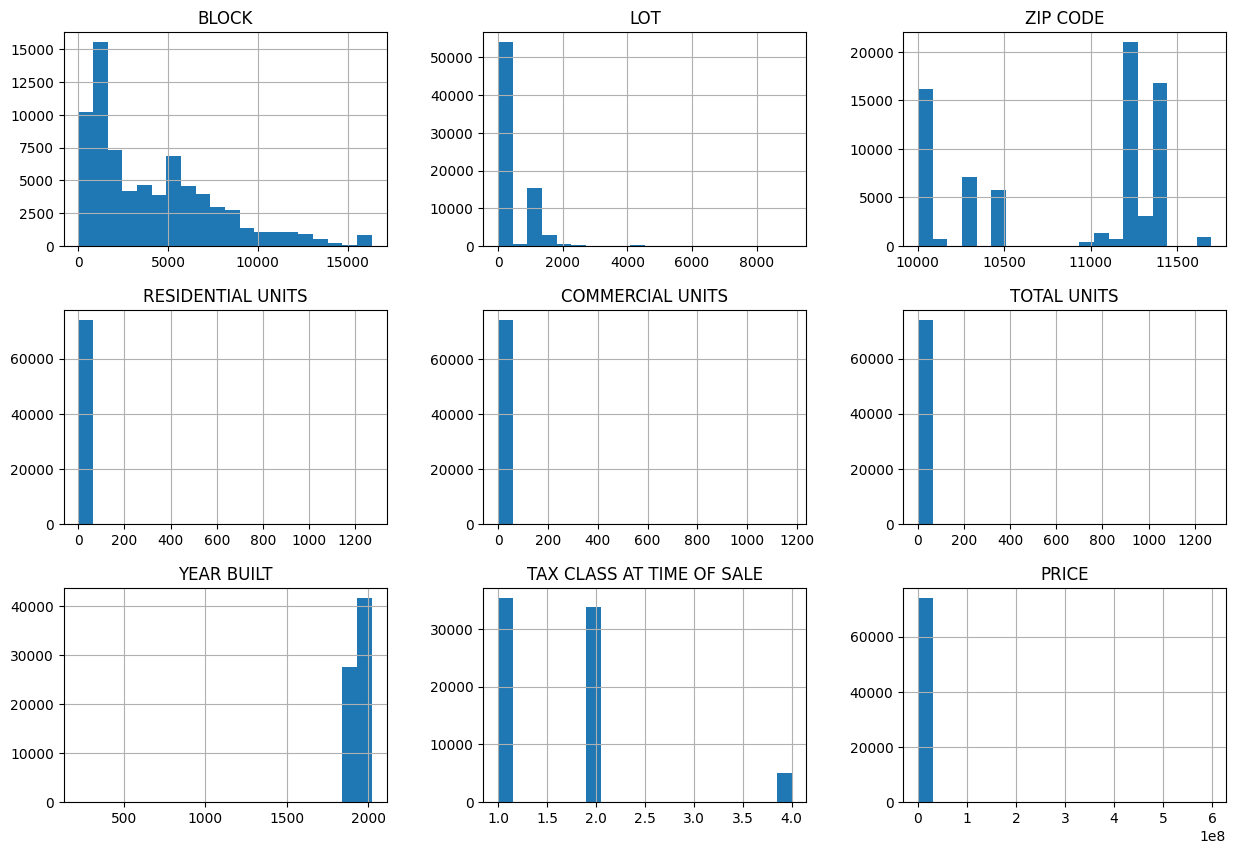

In [9]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

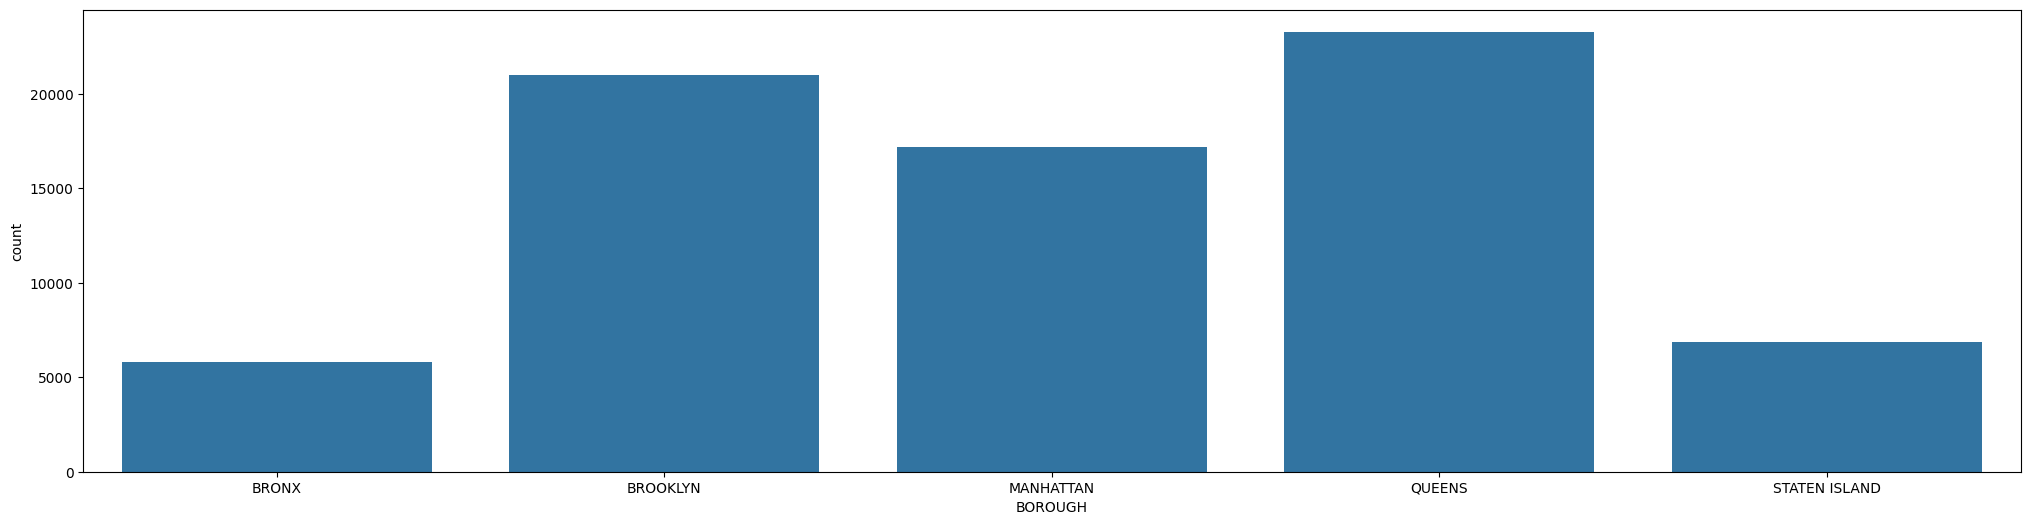

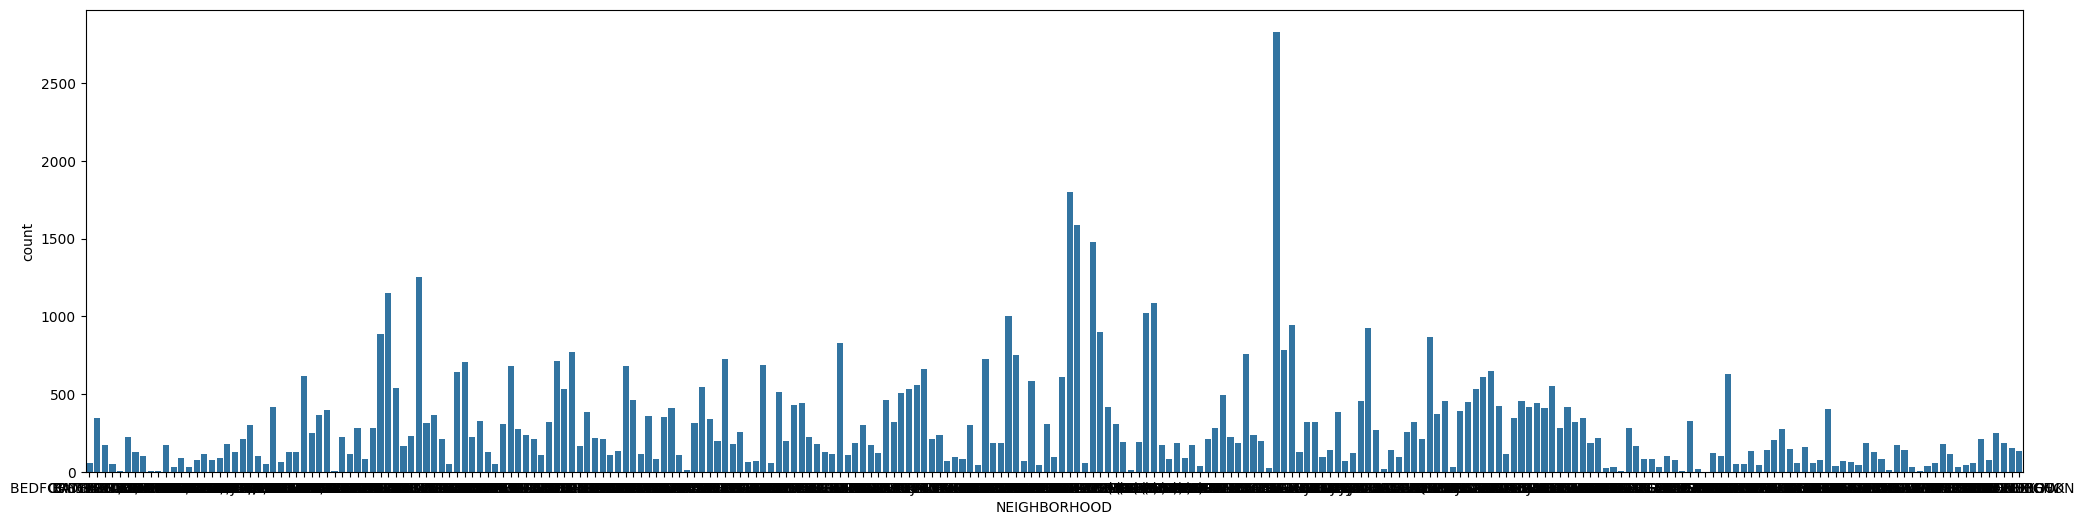

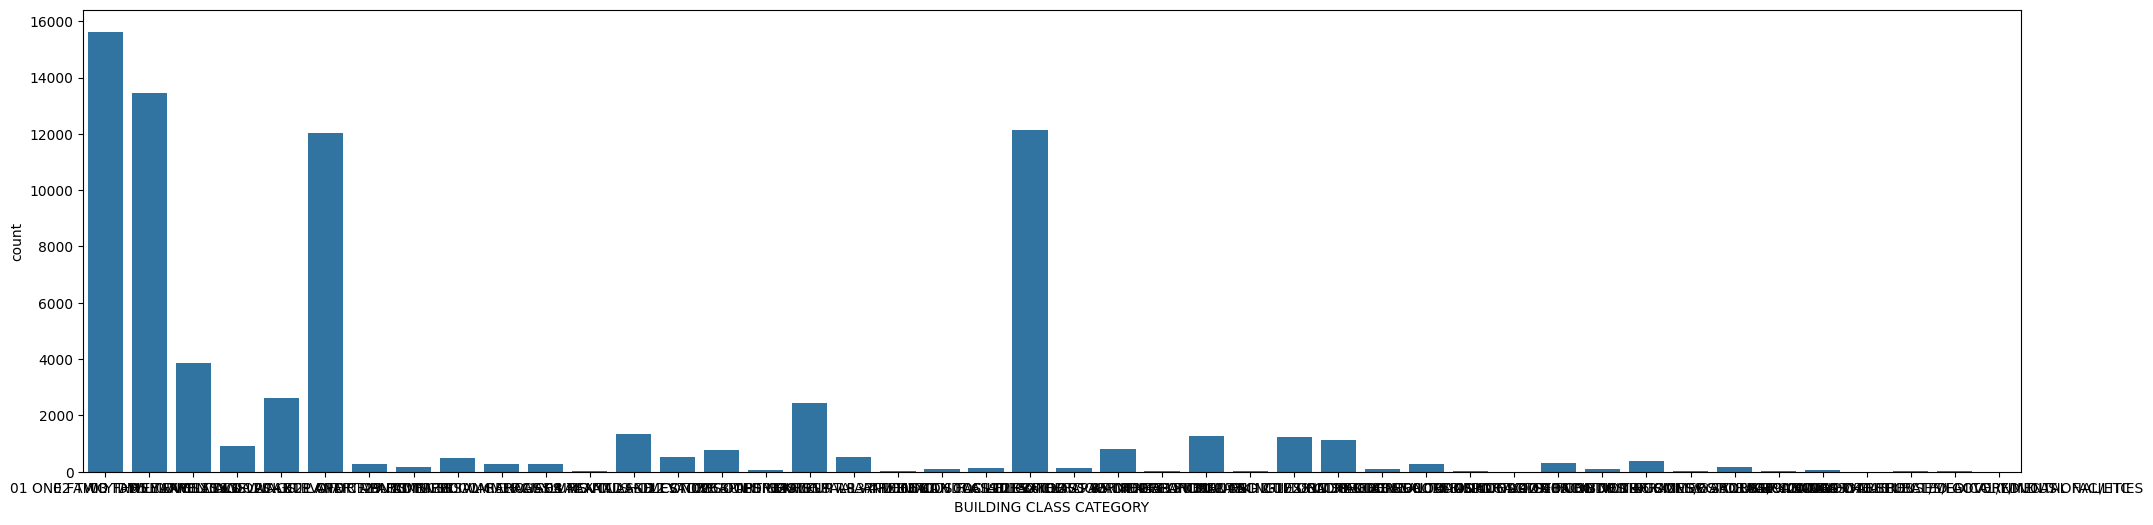

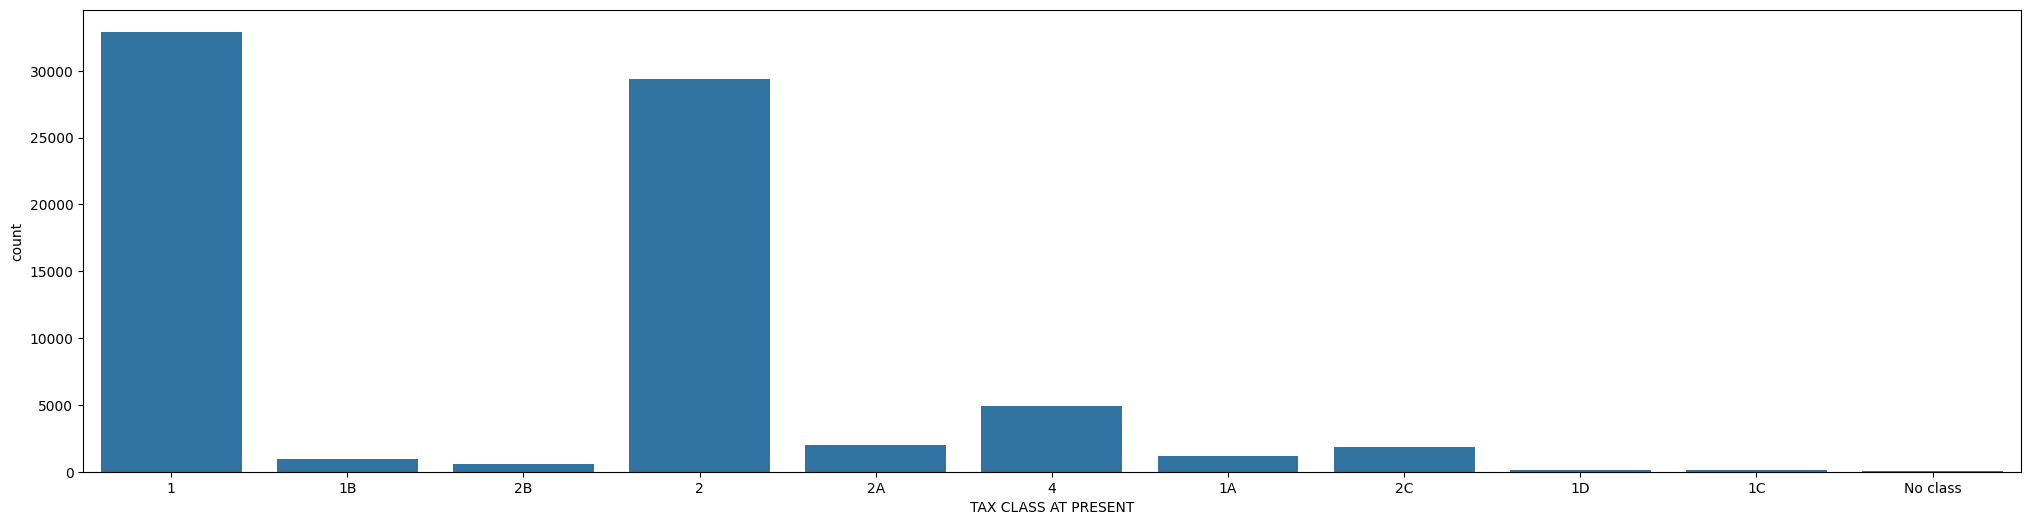

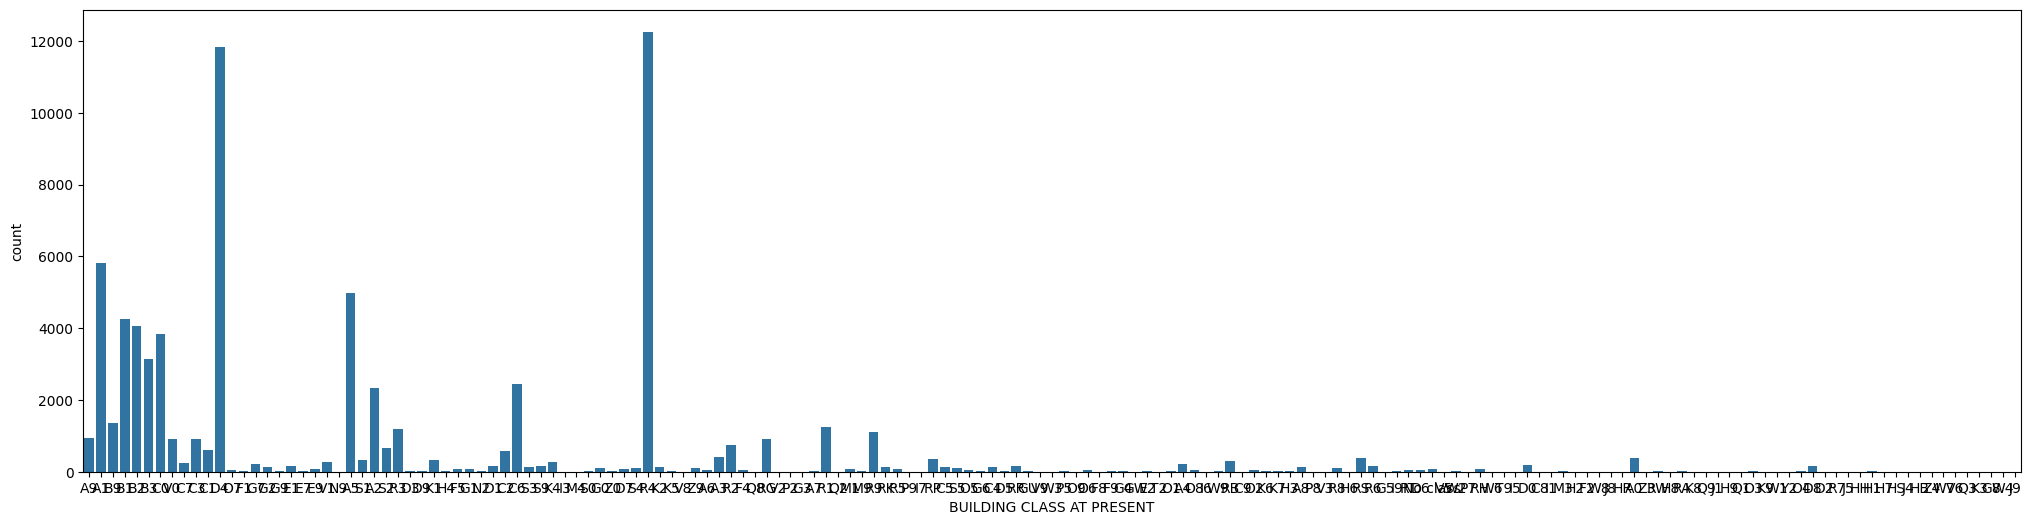

In [10]:
for column in df[['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT']].select_dtypes(include='object').columns:
    plt.figure(figsize=(25, 6))
    sns.countplot(x=column, data=df)
    plt.show()

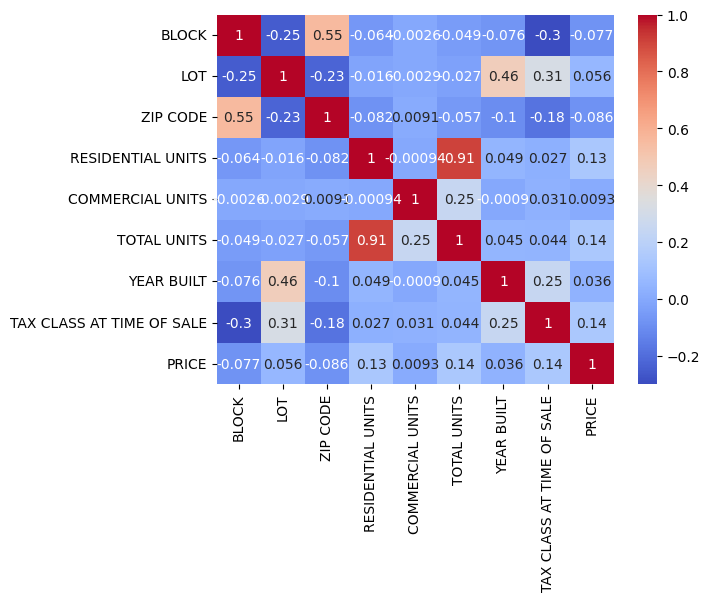

In [11]:
X = df[['BLOCK',	'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',	'TOTAL UNITS', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'PRICE']]
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [12]:
max_category = df['NEIGHBORHOOD'].max()
print(max_category)

WYCKOFF HEIGHTS


In [13]:
min_category = df['NEIGHBORHOOD'].min()
print(min_category)

AIRPORT LA GUARDIA


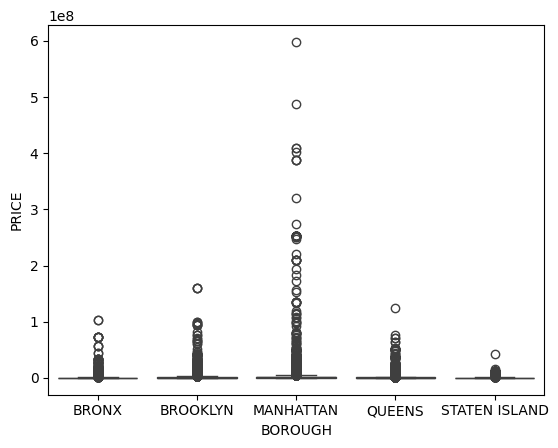

In [14]:
sns.boxplot(x='BOROUGH', y='PRICE', data=df)
plt.show()

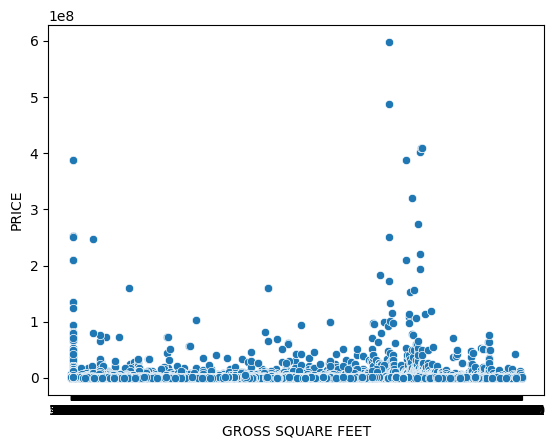

In [15]:
sns.scatterplot(x='GROSS SQUARE FEET', y='PRICE', data=df)
plt.show()
